In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [515]:
df=pd.read_csv("ex2data2.txt", header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [516]:
df.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [517]:
X = df.values[:,0:-1]
y = df.values[:,-1].reshape((X.shape[0],1))

In [518]:
X.shape


(118, 2)

In [519]:
y.shape

(118, 1)

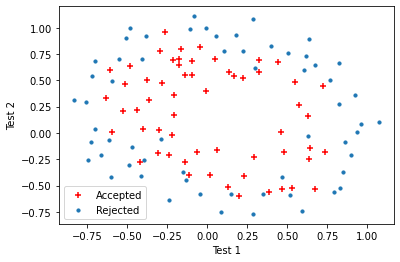

In [520]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

In [521]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z

In [522]:
sigmoid(0)

0.5

In [523]:
def mapFeature(a,b,degree):
    out = np.ones(len(a)).reshape(len(a),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms = (a**(j-i)*b**(j)).reshape(len(a),1)
            out = np.hstack((out,terms))
    return out

In [524]:
X = mapFeature(X[:,0], X[:,1],6)
X.shape

(118, 28)

### Computing Regularize Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$

In [525]:
def costf(X,y,theta,lamb):
    m = len(y)
    pre = sigmoid(np.dot(X,theta))
    error = np.sum(np.multiply(-y,np.log(pre))-np.multiply((1-y),np.log(1-pre)))
    cost = 1/m*error+lamb/2/m*sum(theta**2)
    grad = 1/m*(X.transpose()@(pre-y))
    print(grad[1:].shape)
    grad =grad +lamb/m*theta
    return cost,grad

In [526]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost,grad=costf(X,y,initial_theta,Lambda)

(27, 1)


In [527]:
print("Cost at initial theta (zeros):",cost)
grad

Cost at initial theta (zeros): [0.69314718]


array([[ 8.47457627e-03],
       [-1.14592574e-02],
       [ 7.77711864e-05],
       [-1.82938365e+01],
       [-4.46498732e-02],
       [ 3.76648474e-02],
       [-9.04224813e+02],
       [ 6.68858504e+01],
       [-4.70785882e-01],
       [ 2.34764889e-02],
       [-5.50911507e+04],
       [-9.56352435e+03],
       [ 8.67280480e+01],
       [-5.14689206e-01],
       [ 3.93028171e-02],
       [-3.26144804e+06],
       [ 1.59641151e+06],
       [-1.41000273e+04],
       [ 9.94018996e+01],
       [-5.91273756e-01],
       [ 3.10079849e-02],
       [-1.95214840e+08],
       [-2.47319904e+08],
       [ 2.19546434e+06],
       [-1.54672045e+04],
       [ 1.03567501e+02],
       [-6.38053905e-01],
       [ 3.87936363e-02]])

In [528]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):

    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costf(X,y,theta,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [529]:
theta , J_history = gradientDescent(X,y,initial_theta,1,800,0.2)

(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(27, 1)


<ipython-input-525-098a1c69a0c2>:4: RuntimeWarning: divide by zero encountered in log
  error = np.sum(np.multiply(-y,np.log(pre))-np.multiply((1-y),np.log(1-pre)))
<ipython-input-525-098a1c69a0c2>:4: RuntimeWarning: invalid value encountered in multiply
  error = np.sum(np.multiply(-y,np.log(pre))-np.multiply((1-y),np.log(1-pre)))
<ipython-input-521-913b6c77e6e3>:2: RuntimeWarning: overflow encountered in exp
  z = 1/(1+np.exp(-x))


In [530]:
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[-7.10169492e+00]
 [-4.81430161e+01]
 [-6.20586925e+00]
 [ 1.42297157e+04]
 [-5.78911342e+01]
 [-3.03409517e+01]
 [ 7.85129696e+05]
 [-5.36865603e+04]
 [ 3.32676553e+02]
 [-2.14876634e+01]
 [ 3.34791308e+07]
 [ 7.68123681e+06]
 [-6.94723707e+04]
 [ 3.59614016e+02]
 [-3.16669021e+01]
 [ 4.26430717e+09]
 [-1.28287373e+09]
 [ 1.13008365e+07]
 [-7.95947936e+04]
 [ 4.37867183e+02]
 [-2.60569199e+01]
 [-1.05909404e+11]
 [ 1.98767721e+11]
 [-1.76026763e+09]
 [ 1.23893006e+07]
 [-8.28868163e+04]
 [ 4.72457349e+02]
 [-3.12029000e+01]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

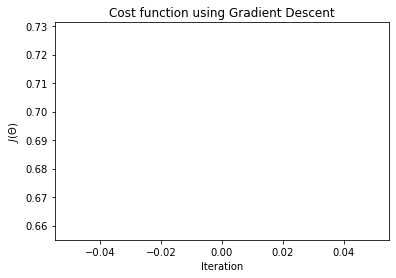

In [531]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")